1. **Importing Required Libraries**

**pandas and numpy** : Used for handling datasets in DataFrame format & Used for generating random data and performing numerical operations.

**matplotlib.pyplot**: Used for visualization.

**sklearn.model_selection.train_test_split**: Splits data into training and test sets.

**sklearn.preprocessing.StandardScaler**: Standardizes feature values.

**sklearn.ensemble.RandomForestClassifier**: A machine learning classifier that uses multiple decision trees.

**sklearn.metrics**: Provides accuracy, classification report, and confusion matrix.

**seaborn**: Used for heatmap visualization of the confusion matrix.

In [22]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

2. **Generating a Sample Dataset**

**np.random.seed(42)**: Ensures reproducibility of random data.

**data_size = 500**: Specifies the number of rows (samples).

A DataFrame (df) is created with 5 columns:

**Age**: Random values between 18 and 65.

**Income**: Random values between 20,000 and 100,000.

**Browsing_Time**: Random values between 5 and 60 minutes.

**Past_Purchases**: Random values between 0 and 20.

**Purchase**: Random binary target (0 = Non-Buyer, 1 = Buyer).


In [13]:
np.random.seed(42)
data_size = 500

df = pd.DataFrame({
    'Age': np.random.randint(18, 65, size=data_size),
    'Income': np.random.randint(20000, 100000, size=data_size),
    'Browsing_Time': np.random.randint(5, 60, size=data_size),
    'Past_Purchases': np.random.randint(0, 20, size=data_size),
    'Purchase': np.random.choice([0, 1], size=data_size)  # Target variable
})

3. **Splitting Features and Target Variable**

X: Independent variables (features).

y: Dependent variable (target column "Purchase").



In [14]:
X = df[['Age', 'Income', 'Browsing_Time', 'Past_Purchases']]
y = df['Purchase']

4. **Splitting Data into Training and Test Sets**


train_test_split: Splits data into training (80%) and testing (20%).
random_state=42: Ensures reproducibility.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Feature Scaling (Standardization)**

Standardization ensures that all features have zero mean and unit variance, improving model performance.

fit_transform: Learns the scaling parameters from training data and applies transformation.

transform: Applies the same scaling to test data.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. **Training the Random Forest Classifier**

RandomForestClassifier(n_estimators=100): Uses 100 decision trees in the ensemble.

model.fit(X_train_scaled, y_train): Trains the model on the training data.


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

7. **Making Predictions**

predict(X_test_scaled): Predicts the target labels for test data.


In [18]:
y_pred = model.predict(X_test_scaled)

8. **Evaluating the Model**

accuracy_score(y_test, y_pred): Computes the accuracy of the model.
Accuracy is displayed in two decimal places.

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

Model Accuracy: 0.56



9. **Printing the Classification Report**

Classification Report includes:

Precision: How many predicted buyers were actually buyers.

Recall: How many actual buyers were correctly predicted.

F1-score: Harmonic mean of precision and recall.

Support: Number of true instances for each class.


In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51        45
           1       0.60      0.60      0.60        55

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100



10. **Confusion Matrix Visualization**
confusion_matrix(y_test, y_pred): Computes the confusion matrix.

sns.heatmap: Creates a heatmap for better visualization.

Labels: "Non-Buyer" (0) and "Buyer" (1).

Interpretation:
True Positives (TP): Correctly predicted buyers.

True Negatives (TN): Correctly predicted non-buyers.

False Positives (FP): Non-buyers misclassified as buyers.

False Negatives (FN): Buyers misclassified as non-buyers.


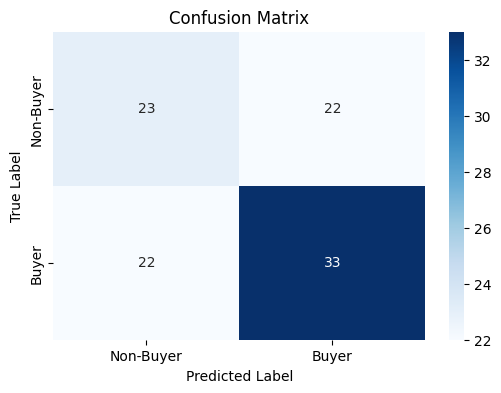

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=["Non-Buyer", "Buyer"], yticklabels=["Non-Buyer", "Buyer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Summary** of Key Steps
**Step	Description**

1	Import necessary libraries.

2	Generate a synthetic dataset with features and target.

3	Separate features (X) and target (y).

4	Split dataset into training (80%) and testing (20%) sets.

5	Standardize the feature values.

6	Train a Random Forest Classifier on the training data.

7	Use the trained model to predict customer purchases.

8	Evaluate performance using accuracy, classification report, and confusion matrix.

9	Display results with a heatmap visualization of the confusion matrix.
